Выполнил: Мошкин Дмитрий Владимирович

Предложена выгрузка количества заказов за один месяц с детализацией по дням. Несколько дней пропущено. 

Требуется восстановить количество заказов в пропущенные дни и пояснить выбор способа восстановления этих значений.

In [426]:
import pandas as pd
import numpy as np

%matplotlib inline

In [443]:
df = pd.read_csv('orders_test - orders_test.csv')

In [444]:
# посмотрим на данные

df.orders_count_with_misses

0     1886.0
1        NaN
2     1944.0
3      541.0
4      494.0
5     1988.0
6     1974.0
7        NaN
8     2074.0
9     1950.0
10     477.0
11     379.0
12     538.0
13    1873.0
14    1923.0
15    2087.0
16    1884.0
17     530.0
18     455.0
19    1896.0
20       NaN
21    1976.0
22    2160.0
23    1943.0
24     473.0
25     452.0
26       NaN
27    1941.0
28    1945.0
29    2062.0
Name: orders_count_with_misses, dtype: float64

Выборка очень маленькая, если есть возможность, то стоит добавить еще данных.

По цифрам визуально можно судить, что значения в столбце изменяются волнообразно. Посмотрим на график, убедимся что распределение имеет цикличность. На графике есть резкие скачки и более плавные переходы.

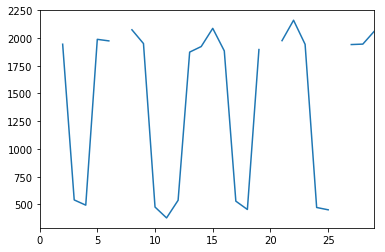

In [445]:
df.orders_count_with_misses.plot();

В имеющейся выборке имеются единичные пропуски. В виду наблюдаемой цикличности заполнить их будет огранично средним из ближайших ячеек.

Будем двигать окно равное 3 с шагом 1. Если nan в первом или втором индексе, то заполняем средним по трём ячейкам. Такое условие нужно для того, что заполнять средним именно по ближайшим ячейкам.

Если пропусков будет два подряд, то алгоритм будет работать и с такими данными. Если пропусков подряд будет больше, нужно будет пересмотреть параметры.

In [447]:
col_with_na = df.orders_count_with_misses.copy()
col = df.orders_count_with_misses
for i in range(len(col.values)-1):
    if pd.isna(col[i]) or pd.isna(col[i+1]):
        col[i : 3+i].fillna(np.mean(col[i : i+3]), inplace=True)

Посмотрим на график получившегося результата

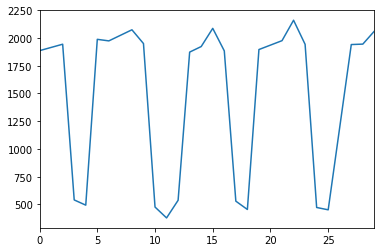

In [423]:
df.orders_count_with_misses.plot();

Видим, что заполненные значения вписываются в исходные циклы, результат выглядит приемлимым.

Дополнительно проведем исследование: создадим дополнительные пропуски, заполним и визуально проверим качество.

In [595]:
df = pd.read_csv('orders_test - orders_test.csv')
df.orders_count_with_misses.loc[4] = None
df.orders_count_with_misses.loc[10] = None
df.orders_count_with_misses.loc[16] = None
df.orders_count_with_misses.loc[29] = None

In [ ]:
col_with_na = df.orders_count_with_misses.copy()
col = df.orders_count_with_misses
for i in range(len(col.values)-1):
    if pd.isna(col[i]) or pd.isna(col[i+1]):
        col[i : 3+i].fillna(np.mean(col[i : i+3]), inplace=True)

In [622]:
# Сводная таблица результатов предсказания
pd.DataFrame({'dropped': col_with_na.values, 'original': df_2.orders_count_with_misses,\
              'filled': col.values})

,dropped,original,filled
0,1886.0,1886.0,1886.0
1,NaN,NaN,1915.0
2,1944.0,1944.0,1944.0
3,541.0,541.0,541.0
4,NaN,494.0,1264.5
5,1988.0,1988.0,1988.0
6,1974.0,1974.0,1974.0
7,NaN,NaN,2024.0
8,2074.0,2074.0,2074.0
9,1950.0,1950.0,1950.0


In [611]:
# Искомые значения
pd.DataFrame({'dropped': col_with_na.values, 'original': df_2.orders_count_with_misses, 'filled': col.values}).loc[[4, 10, 16, 29]]

,dropped,original,filled
4,NaN,494.0,1264.5
10,NaN,477.0,1164.5
16,NaN,1884.0,1308.5
29,NaN,2062.0,1945.0


Вывод: предложенный метод хорошо сглаживает пропуски, но плохо работает там, где в реальности есть резкие скачки, прогнозирование которых на основе предложенной выборки представляется трудно возможным.